In [233]:
import pandas as pd
import numpy as np
import datetime as dt


import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import matplotlib.dates as mdates
mpl.rcParams['figure.dpi']= 500

import sys

%load_ext autoreload
%autoreload 2


sys.path.append('../')
import src.read_raw as rr
#import src.find_ngi_files as fnf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
colors = pd.read_csv('../src/cyclic.dat',names=['red','green','blue'])
cyclic = mpl.colors.ListedColormap(np.array(colors))
LscNorm  = mpl.colors.Normalize(vmin=0,vmax=360)
LonNorm = mpl.colors.Normalize(vmin=-180,vmax=180)

In [63]:
hp_all = pd.read_csv('../output/psg/homopause.csv')
peri = pd.read_csv('../peri.csv')
hp_all = pd.merge(hp_all,peri,on='orbit')
hp_all.head()

slope  intercept    rvalue  pvalue    stderr      hp_alt  orbit  count  \
0  0.024819  -2.857838  0.970742     0.0  0.000219  124.137278    713      6   
1  0.024294  -2.783472  0.970611     0.0  0.000199  123.760841    714      7   
2  0.023861  -2.692220  0.959214     0.0  0.000216  122.182029    715      8   
3  0.024227  -2.759739  0.960841     0.0  0.000202  123.122163    716      9   
4  0.023680  -2.659438  0.953036     0.0  0.000207  121.729401    717     10   

           Ls  abundance_Ar  ...    quality_CO2  quality_He  quality_N2  \
0  289.164029  4.977207e+08  ...             IV          IV          IV   
1  289.280508  6.308803e+08  ...             OU          OV          OV   
2  289.396940  3.858793e+08  ...             OU          OV          OV   
3  289.513303  5.951745e+08  ...             OU          OV          OV   
4  289.629642  5.207472e+08  ...             OU          OV          OV   

   quality_O       sza    t_sclk_cor        t_tid        t_unix  \
0         IV  113.7617  4.768985e+08  5389.223337  1.423627e+09   
1         OU  113.5109  4.769150e+08  5387.433335  1.423643e+09   
2         OU  113.2219  4.769314e+08  5390.693337  1.423659e+09   
3         OU  112.9801  4.769478e+08  5388.613336  1.423676e+09   
4         OU  112.6839  4.769643e+08  5387.353335  1.423692e+09   

                 t_utc    tid  
0  2015-02-11T03:48:50  14926  
1  2015-02-11T08:22:57  14928  
2  2015-02-11T12:57:01  14930  
3  2015-02-11T17:30:59  14932  
4  2015-02-11T22:04:57  14934  

[5 rows x 55 columns]

In [217]:
hp = hp_all[(hp_all['count']>=9)&(hp_all['rvalue']>0.6)].copy()

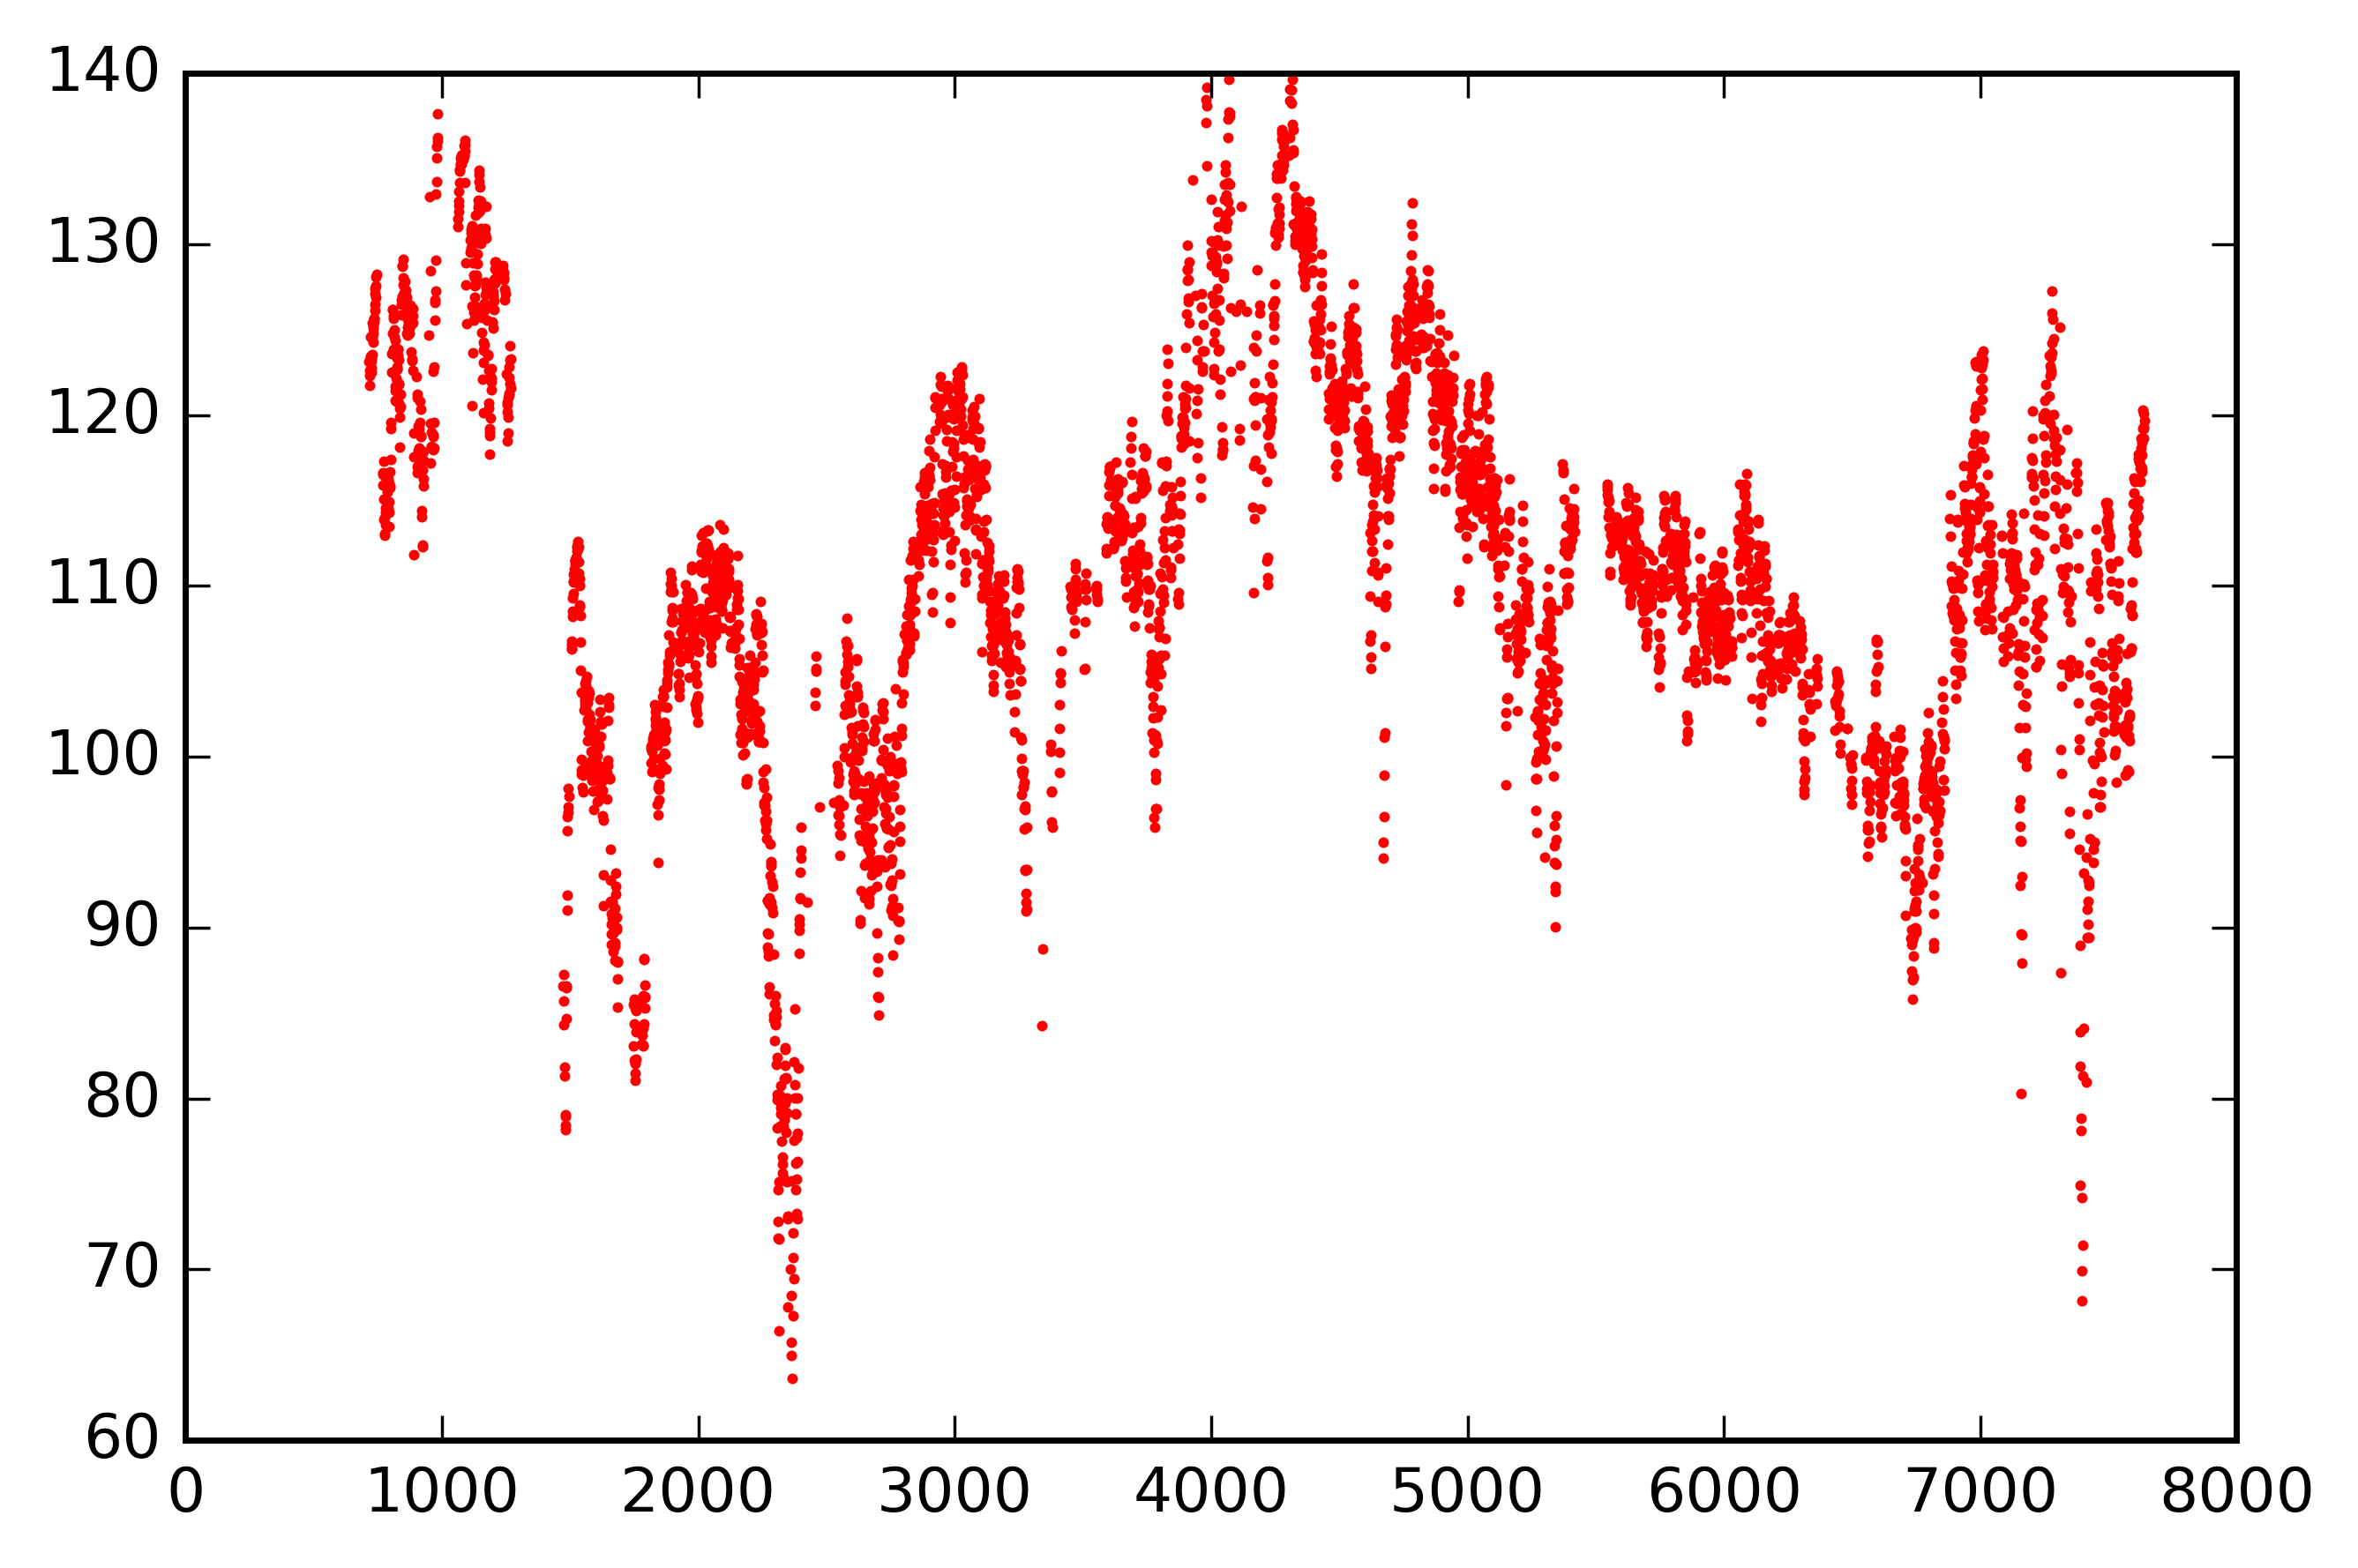

In [218]:
plt.figure()
plt.scatter(hp['orbit'],hp['hp_alt'],s=3,lw=0,c='r')
plt.ylim(60,140)
plt.show()

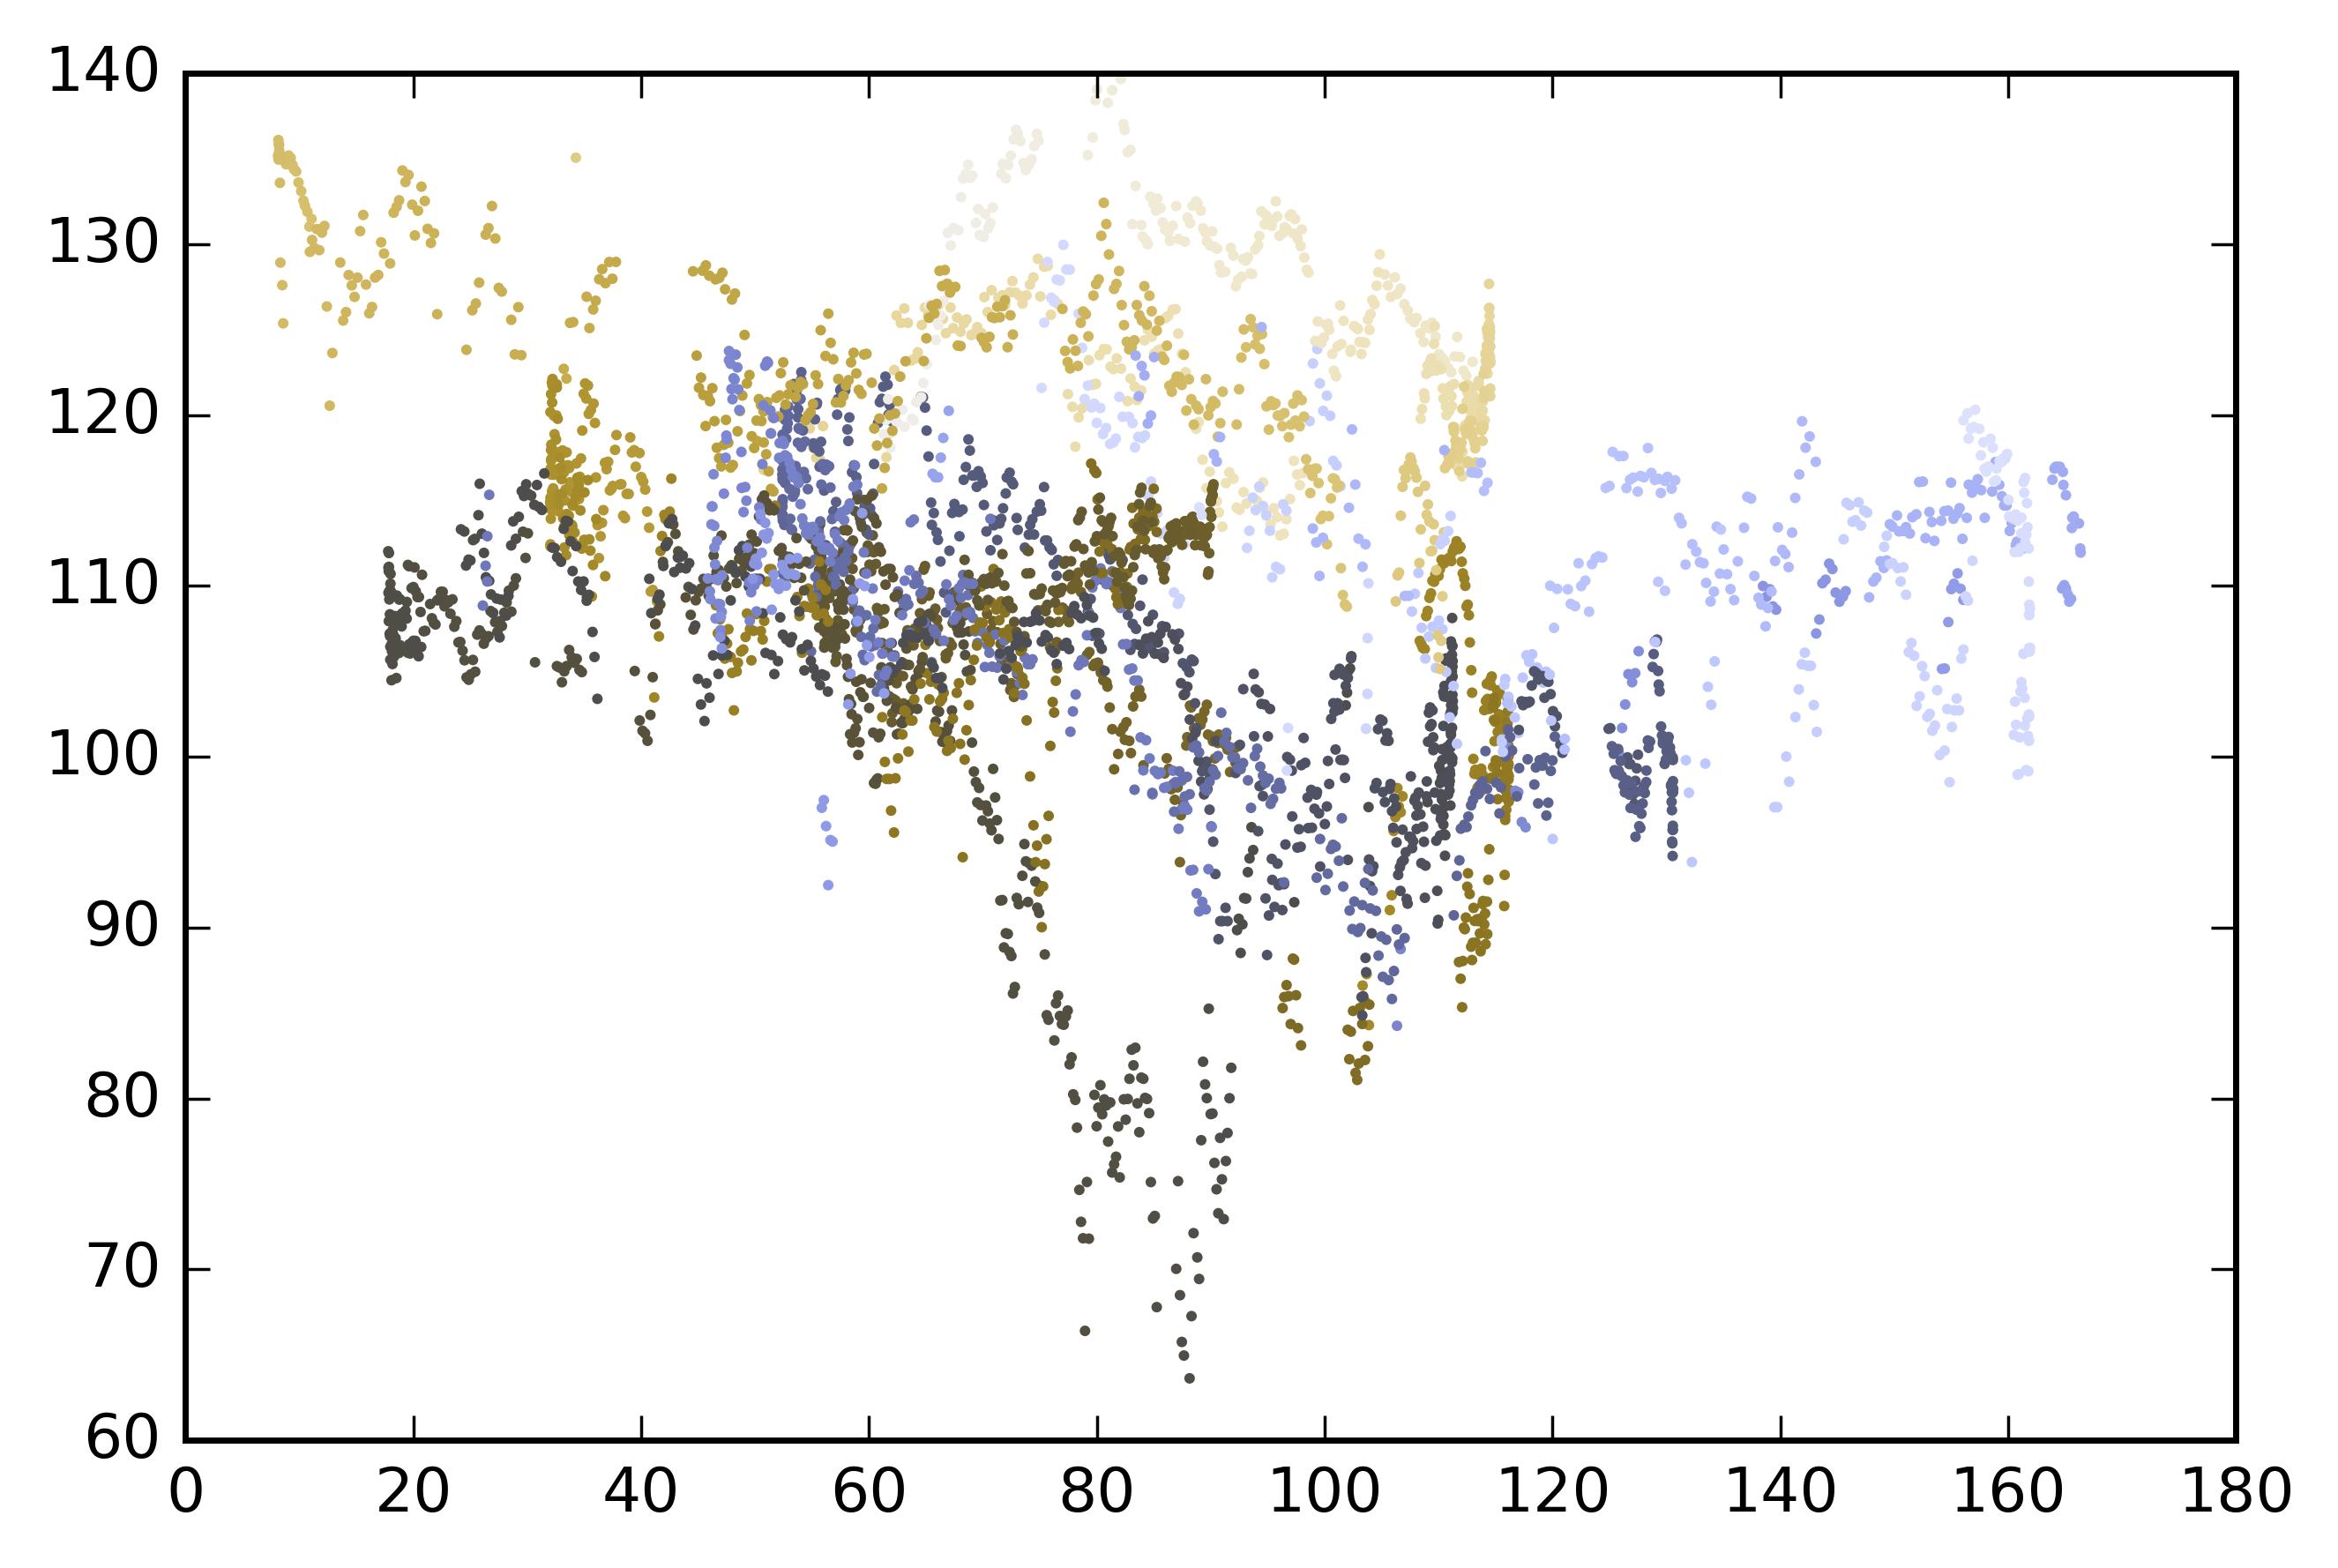

In [198]:
plt.figure()
plt.scatter(hp['sza'],hp['hp_alt'],s=3,lw=0,c=hp['Ls'],cmap=cyclic,norm=LscNorm)
plt.ylim(60,140)

plt.show()

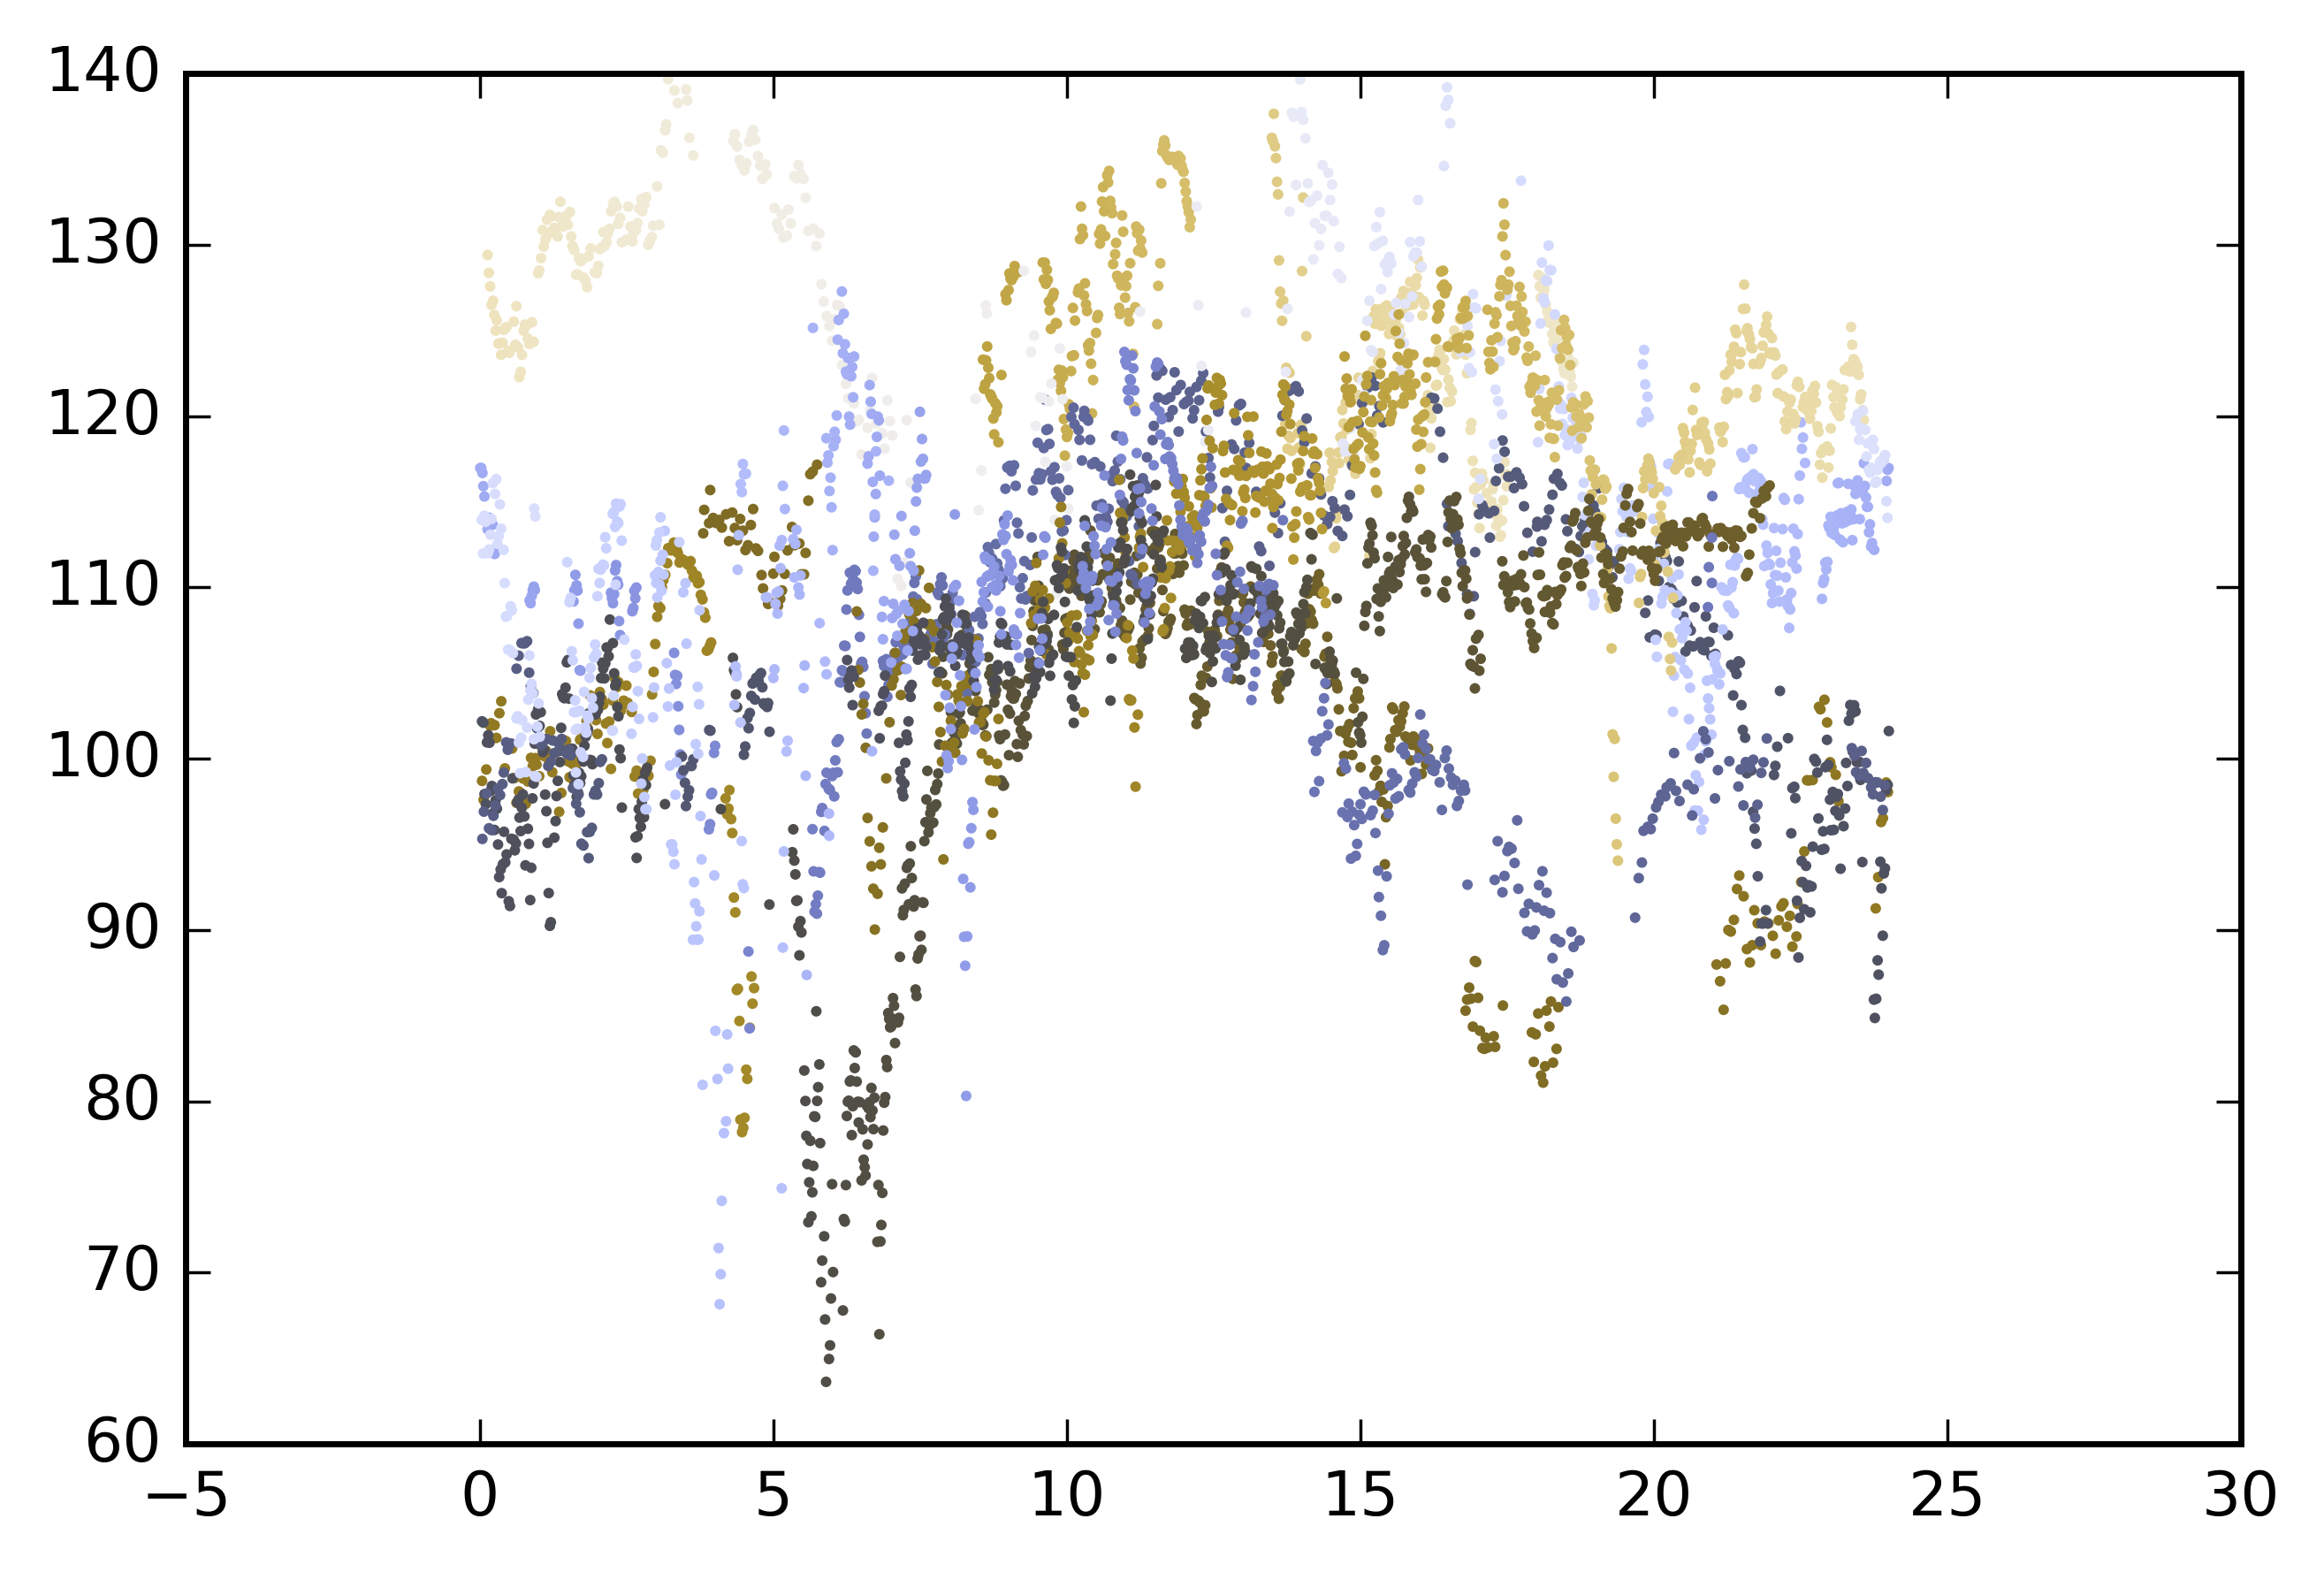

In [91]:
plt.figure()
plt.scatter(hp['lst'],hp['hp_alt'],s=3,lw=0,c=hp['Ls'],cmap=cyclic,norm=LscNorm)
plt.ylim(60,140)
plt.show()

In [203]:
latbins = np.linspace(-90,90,8)
latbin_mids = (latbins[:-1]+latbins[1:])/2
hp['lat_bin'] = pd.cut(hp['lat'],latbins,labels=latbin_mids)
lat_bin = hp.drop('lat',axis=1).groupby('lat_bin').mean().reset_index()

lat_bin     slope  intercept    rvalue         pvalue    stderr  \
0 -77.142857  0.029747  -2.898439  0.911504  1.479734e-182  0.000388   
1 -51.428571  0.028444  -3.045414  0.916219  2.017426e-177  0.000359   
2 -25.714286  0.028443  -2.970053  0.895991  1.691740e-164  0.000416   
3   0.000000  0.026070  -2.643032  0.901253  6.064827e-109  0.000377   
4  25.714286  0.025151  -2.563734  0.905277  3.346058e-123  0.000360   
5  51.428571  0.027357  -2.733081  0.898641  1.526027e-205  0.000385   
6  77.142857  0.025986  -2.696863  0.901797  3.500631e-120  0.000383   

       hp_alt        orbit      count          Ls      ...       precision_CO  \
0  103.985267  4319.512881  10.187354  123.783909      ...           0.000196   
1  113.770617  4153.332198  10.207836  162.170401      ...           0.000177   
2  112.421521  3984.438881  10.282769  189.339491      ...          -7.356193   
3  109.836003  4057.289517  10.111481  188.873705      ...           0.000218   
4  111.828951  4509.020443  10.156729  184.735066      ...          -1.701663   
5  107.305157  4157.411411  10.351351  108.753435      ...          -2.999804   
6  112.206765  4116.886905  10.229167  101.600568      ...         -59.464095   

   precision_CO2  precision_He  precision_N2  precision_O         sza  \
0       0.000072      0.020839      0.001460     0.000448  104.675880   
1       0.000060      0.025556      0.001404     0.000455   84.417453   
2      -7.356328      0.028368     -7.354812    -7.355908   82.975399   
3       0.000080      0.032723      0.001636     0.000541   66.647925   
4      -1.701798      0.032340     -1.700236    -1.701348   72.486519   
5      -2.999926      0.028693     -2.998559    -2.999565   83.653291   
6     -59.464216      0.032542    -59.462843   -59.463830   75.235072   

     t_sclk_cor        t_tid        t_unix           tid  
0  5.353581e+08  5401.121143  1.482086e+09  22139.025761  
1  5.326743e+08  5397.745997  1.479402e+09  21806.664395  
2  5.299348e+08  5398.469553  1.476663e+09  21468.877761  
3  5.311859e+08  5403.898527  1.477914e+09  21614.579035  
4  5.385464e+08  5402.569515  1.485274e+09  22518.040886  
5  5.328367e+08  5399.174987  1.479565e+09  21814.822823  
6  5.321766e+08  5330.061574  1.478905e+09  21733.773810  

[7 rows x 42 columns]

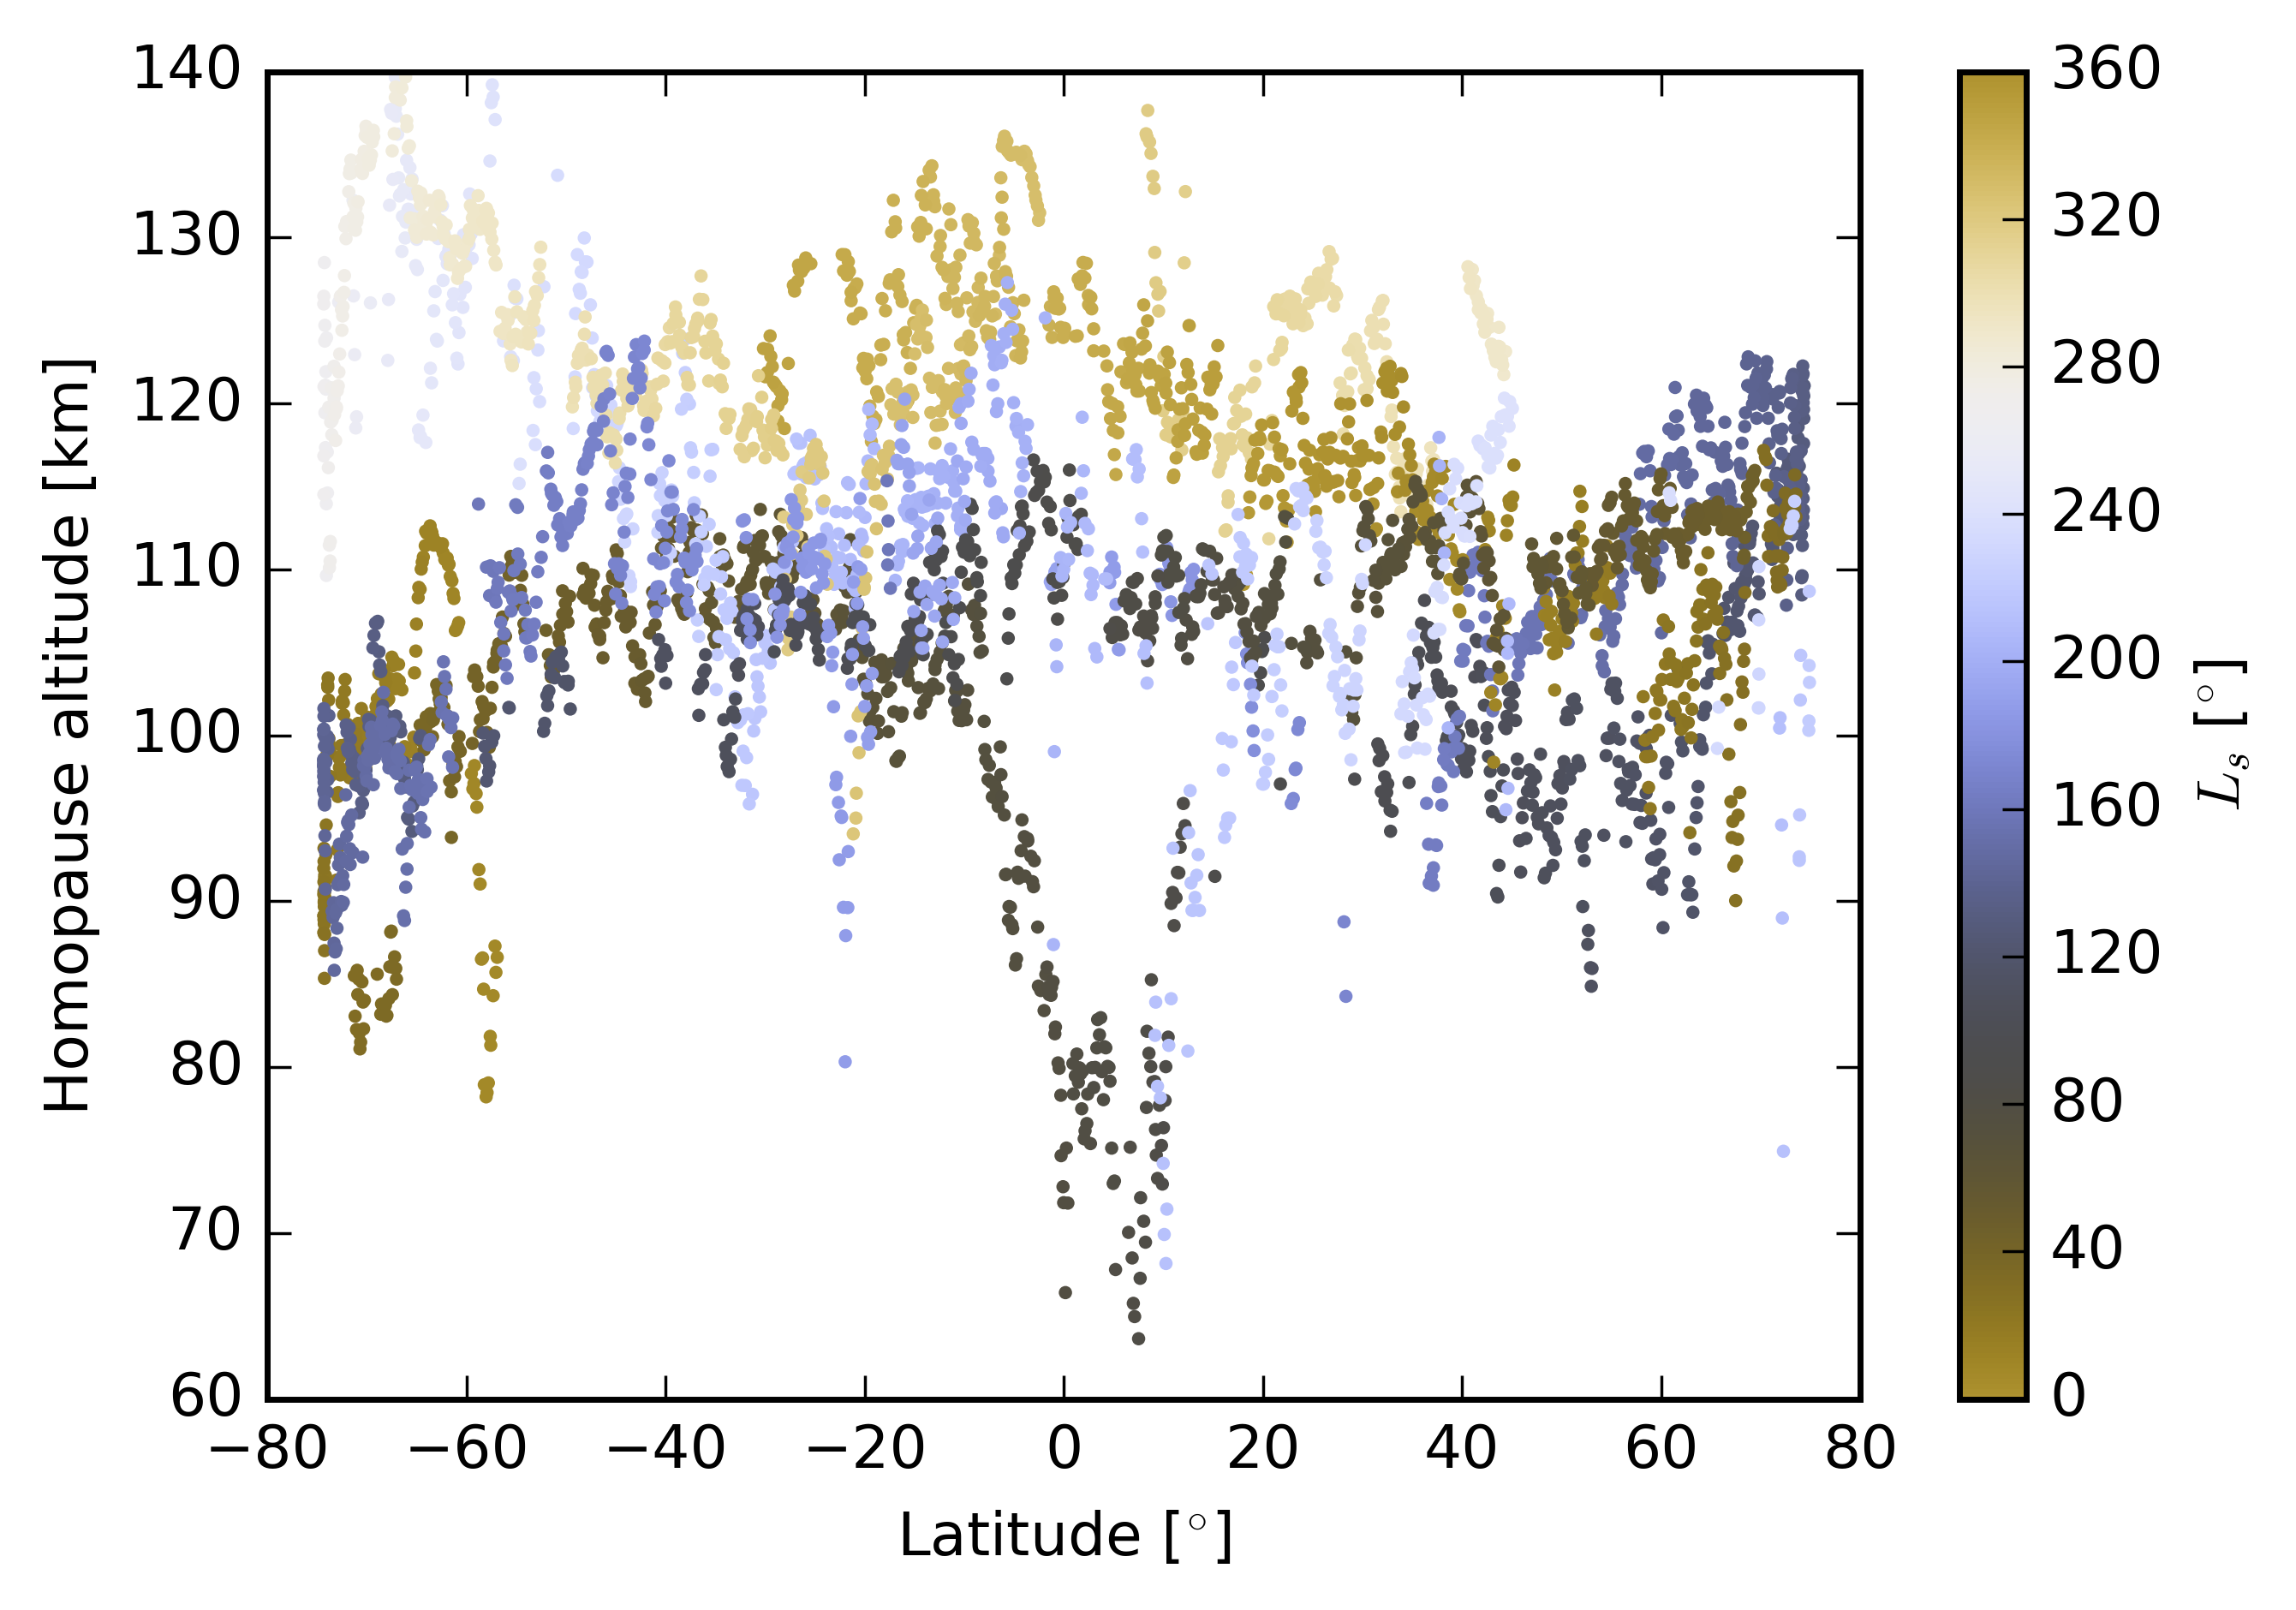

In [264]:
plt.figure()
cax = plt.scatter(hp['lat'],hp['hp_alt'],s=5,lw=0,c=hp['Ls'],cmap=cyclic,norm=LscNorm)
#plt.plot(lat_bin['lat_bin'],lat_bin['hp_alt'],c='k',lw=2,ls='--')
plt.ylim(60,140)
plt.xlim(-80,80)

plt.xlabel(r'Latitude [$^{\circ}$]')
plt.ylabel('Homopause altitude [km]')
plt.colorbar(cax,label=r'$L_s$ [$^{\circ}$]')

plt.show()

In [210]:
Lsbins = np.linspace(0,360,16)
Lsbin_mids = (Lsbins[:-1]+Lsbins[1:])/2
Lsb = pd.cut(hp['Ls'],Lsbins,labels=Lsbin_mids)
Ls_bin = hp.drop('Ls',axis=1).groupby(Lsb).mean().reset_index()
Ls = list(Ls_bin['Ls'])
Ls_alt = list(Ls_bin['hp_alt'])
Ls_std = hp['hp_alt'].groupby(Lsb).std().reset_index()['hp_alt']

0      8.576145
1      9.524356
2      3.564772
3     13.459130
4      5.134383
5      8.615077
6      8.118191
7      7.518867
8     10.632346
9      9.104404
10    12.436479
11    13.274888
12     4.197308
13     8.139207
14     4.687678
Name: hp_alt, dtype: float64

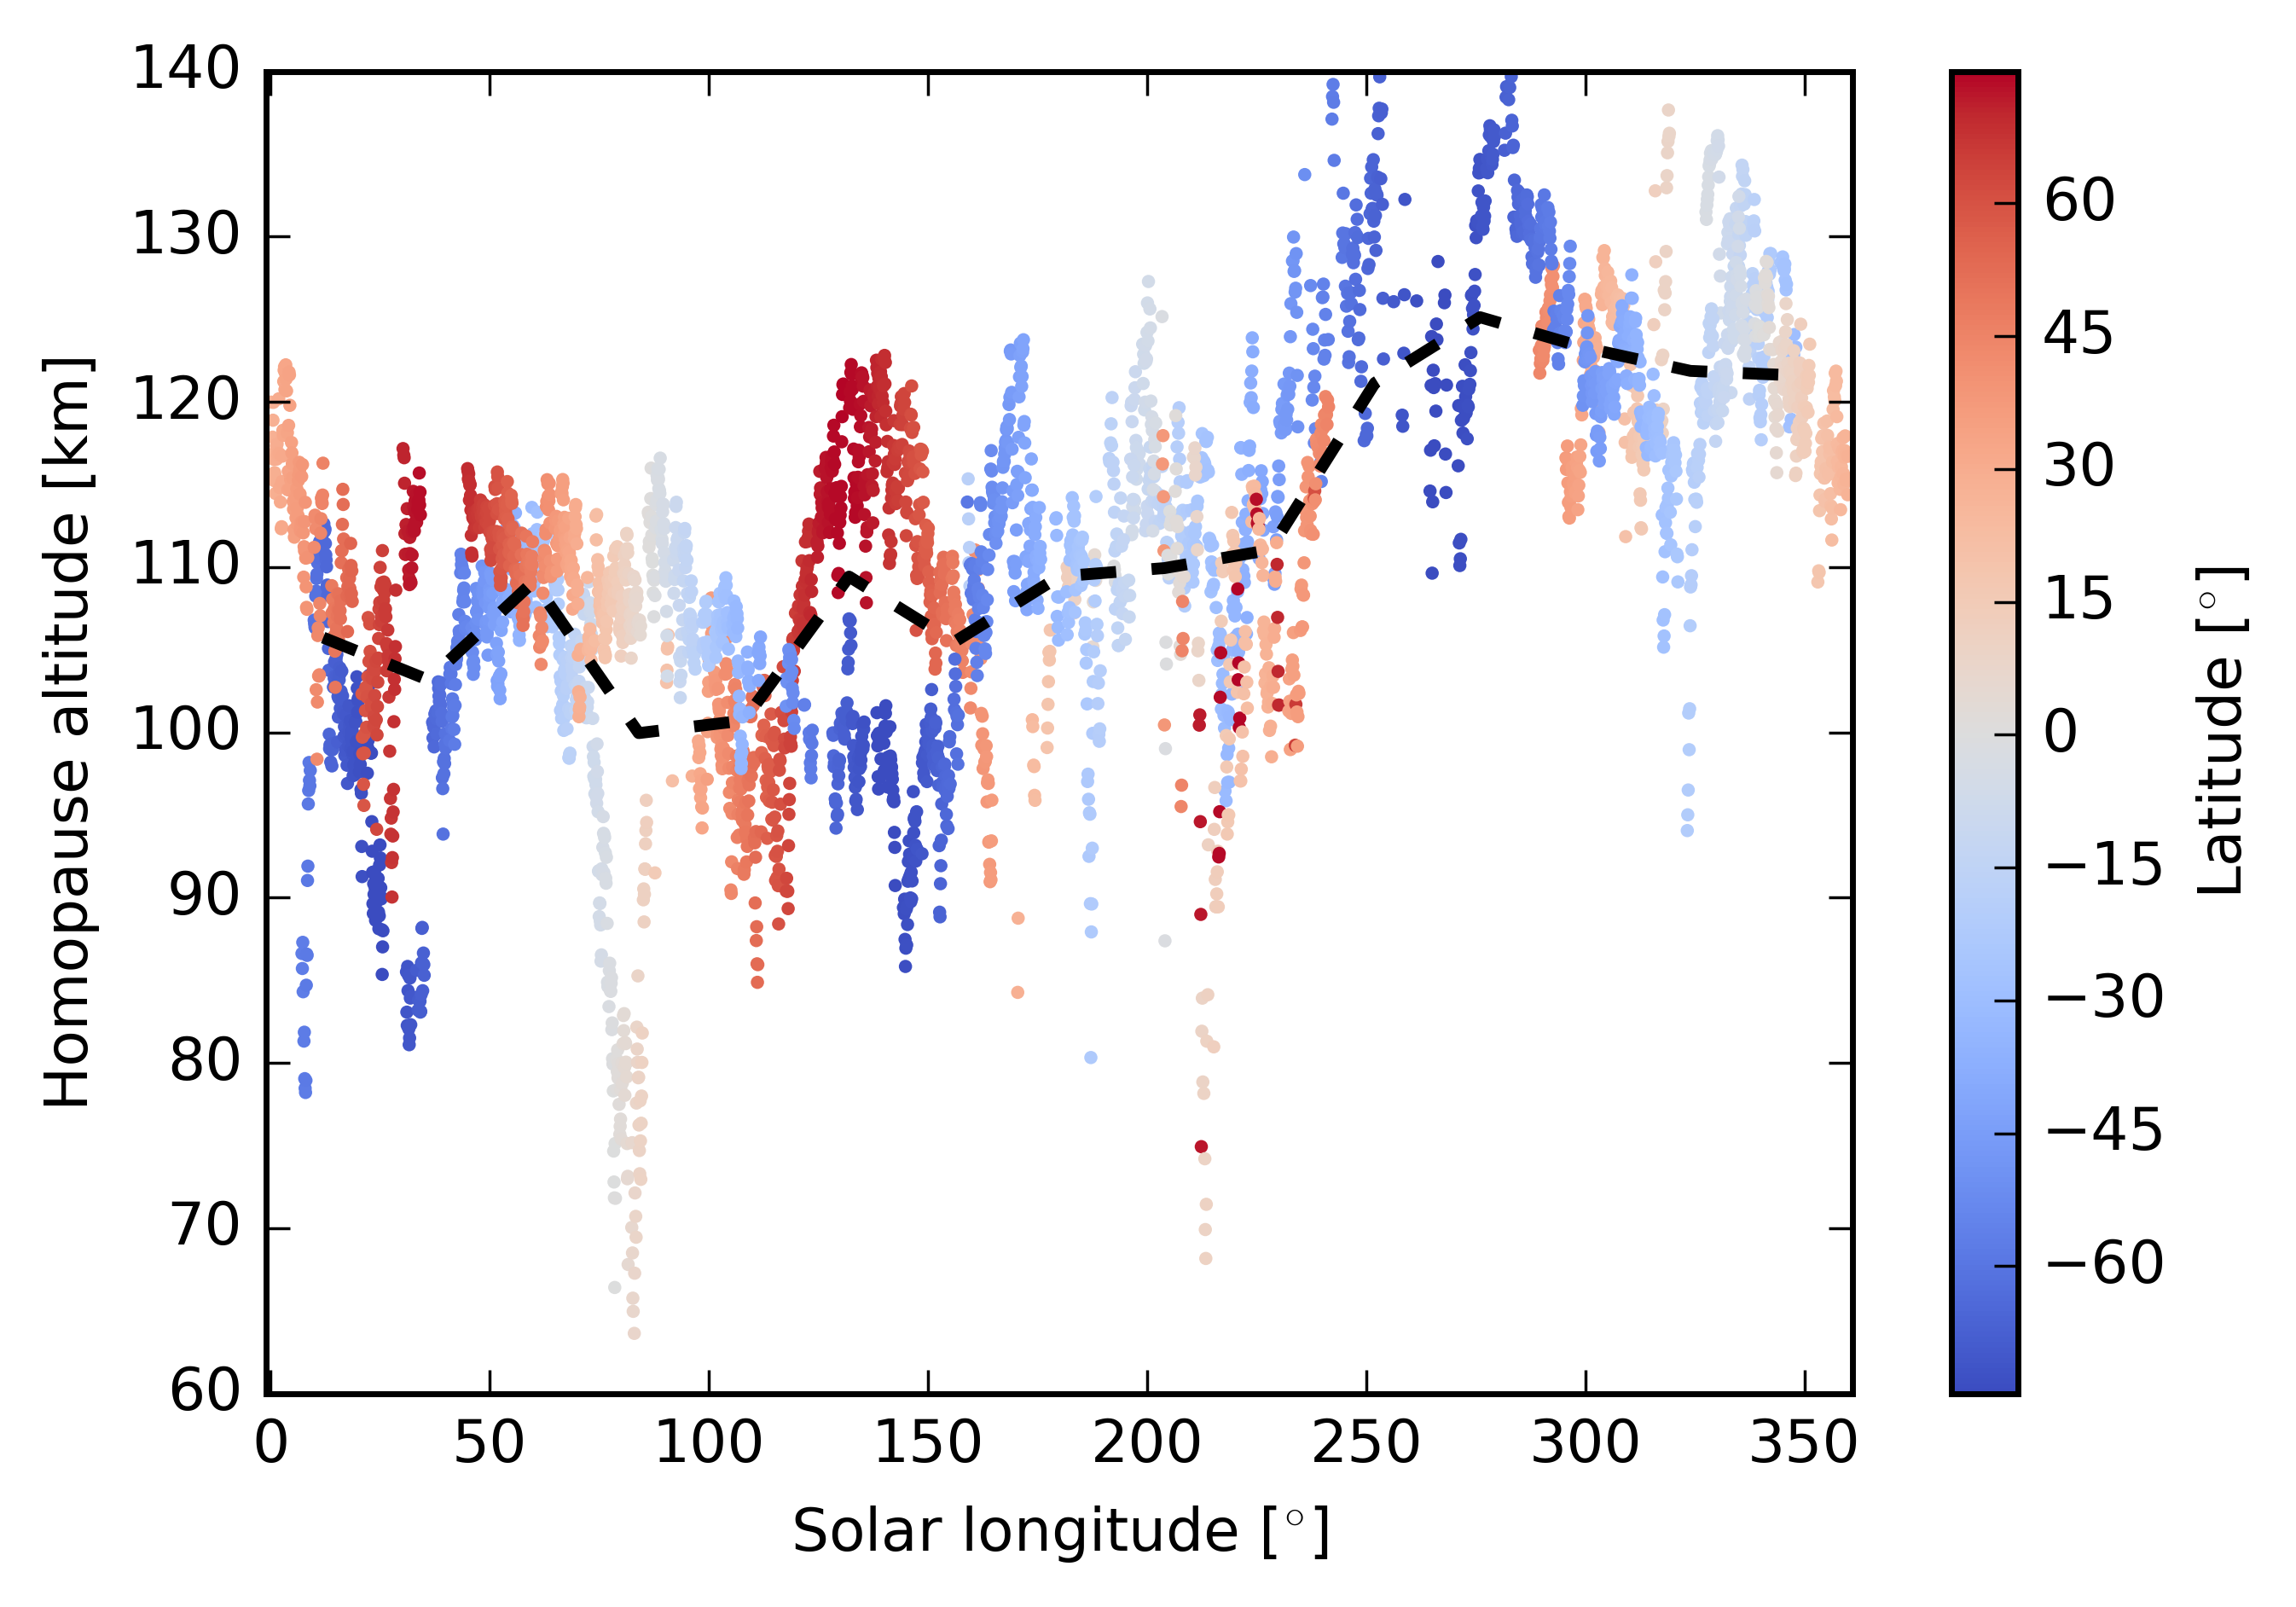

In [262]:
plt.figure()
cax = plt.scatter(hp['Ls'],hp['hp_alt'],s=5,lw=0,c=hp['lat'],cmap='coolwarm')
#plt.scatter(hp['Ls'][hp['lat']>0],hp['hp_alt'][hp['lat']>0],s=5,lw=0,c='r')
#plt.scatter(hp['Ls'][hp['lat']<0],hp['hp_alt'][hp['lat']<0],s=5,lw=0,c='b')

plt.plot(Ls,Ls_alt,c='k',lw=2,ls='--')
plt.ylim(60,140)
plt.xlim(-1,361)
plt.xlabel(r'Solar longitude [$^{\circ}$]')
plt.ylabel('Homopause altitude [km]')
plt.colorbar(cax,label=r'Latitude [$^{\circ}$]')

plt.show()

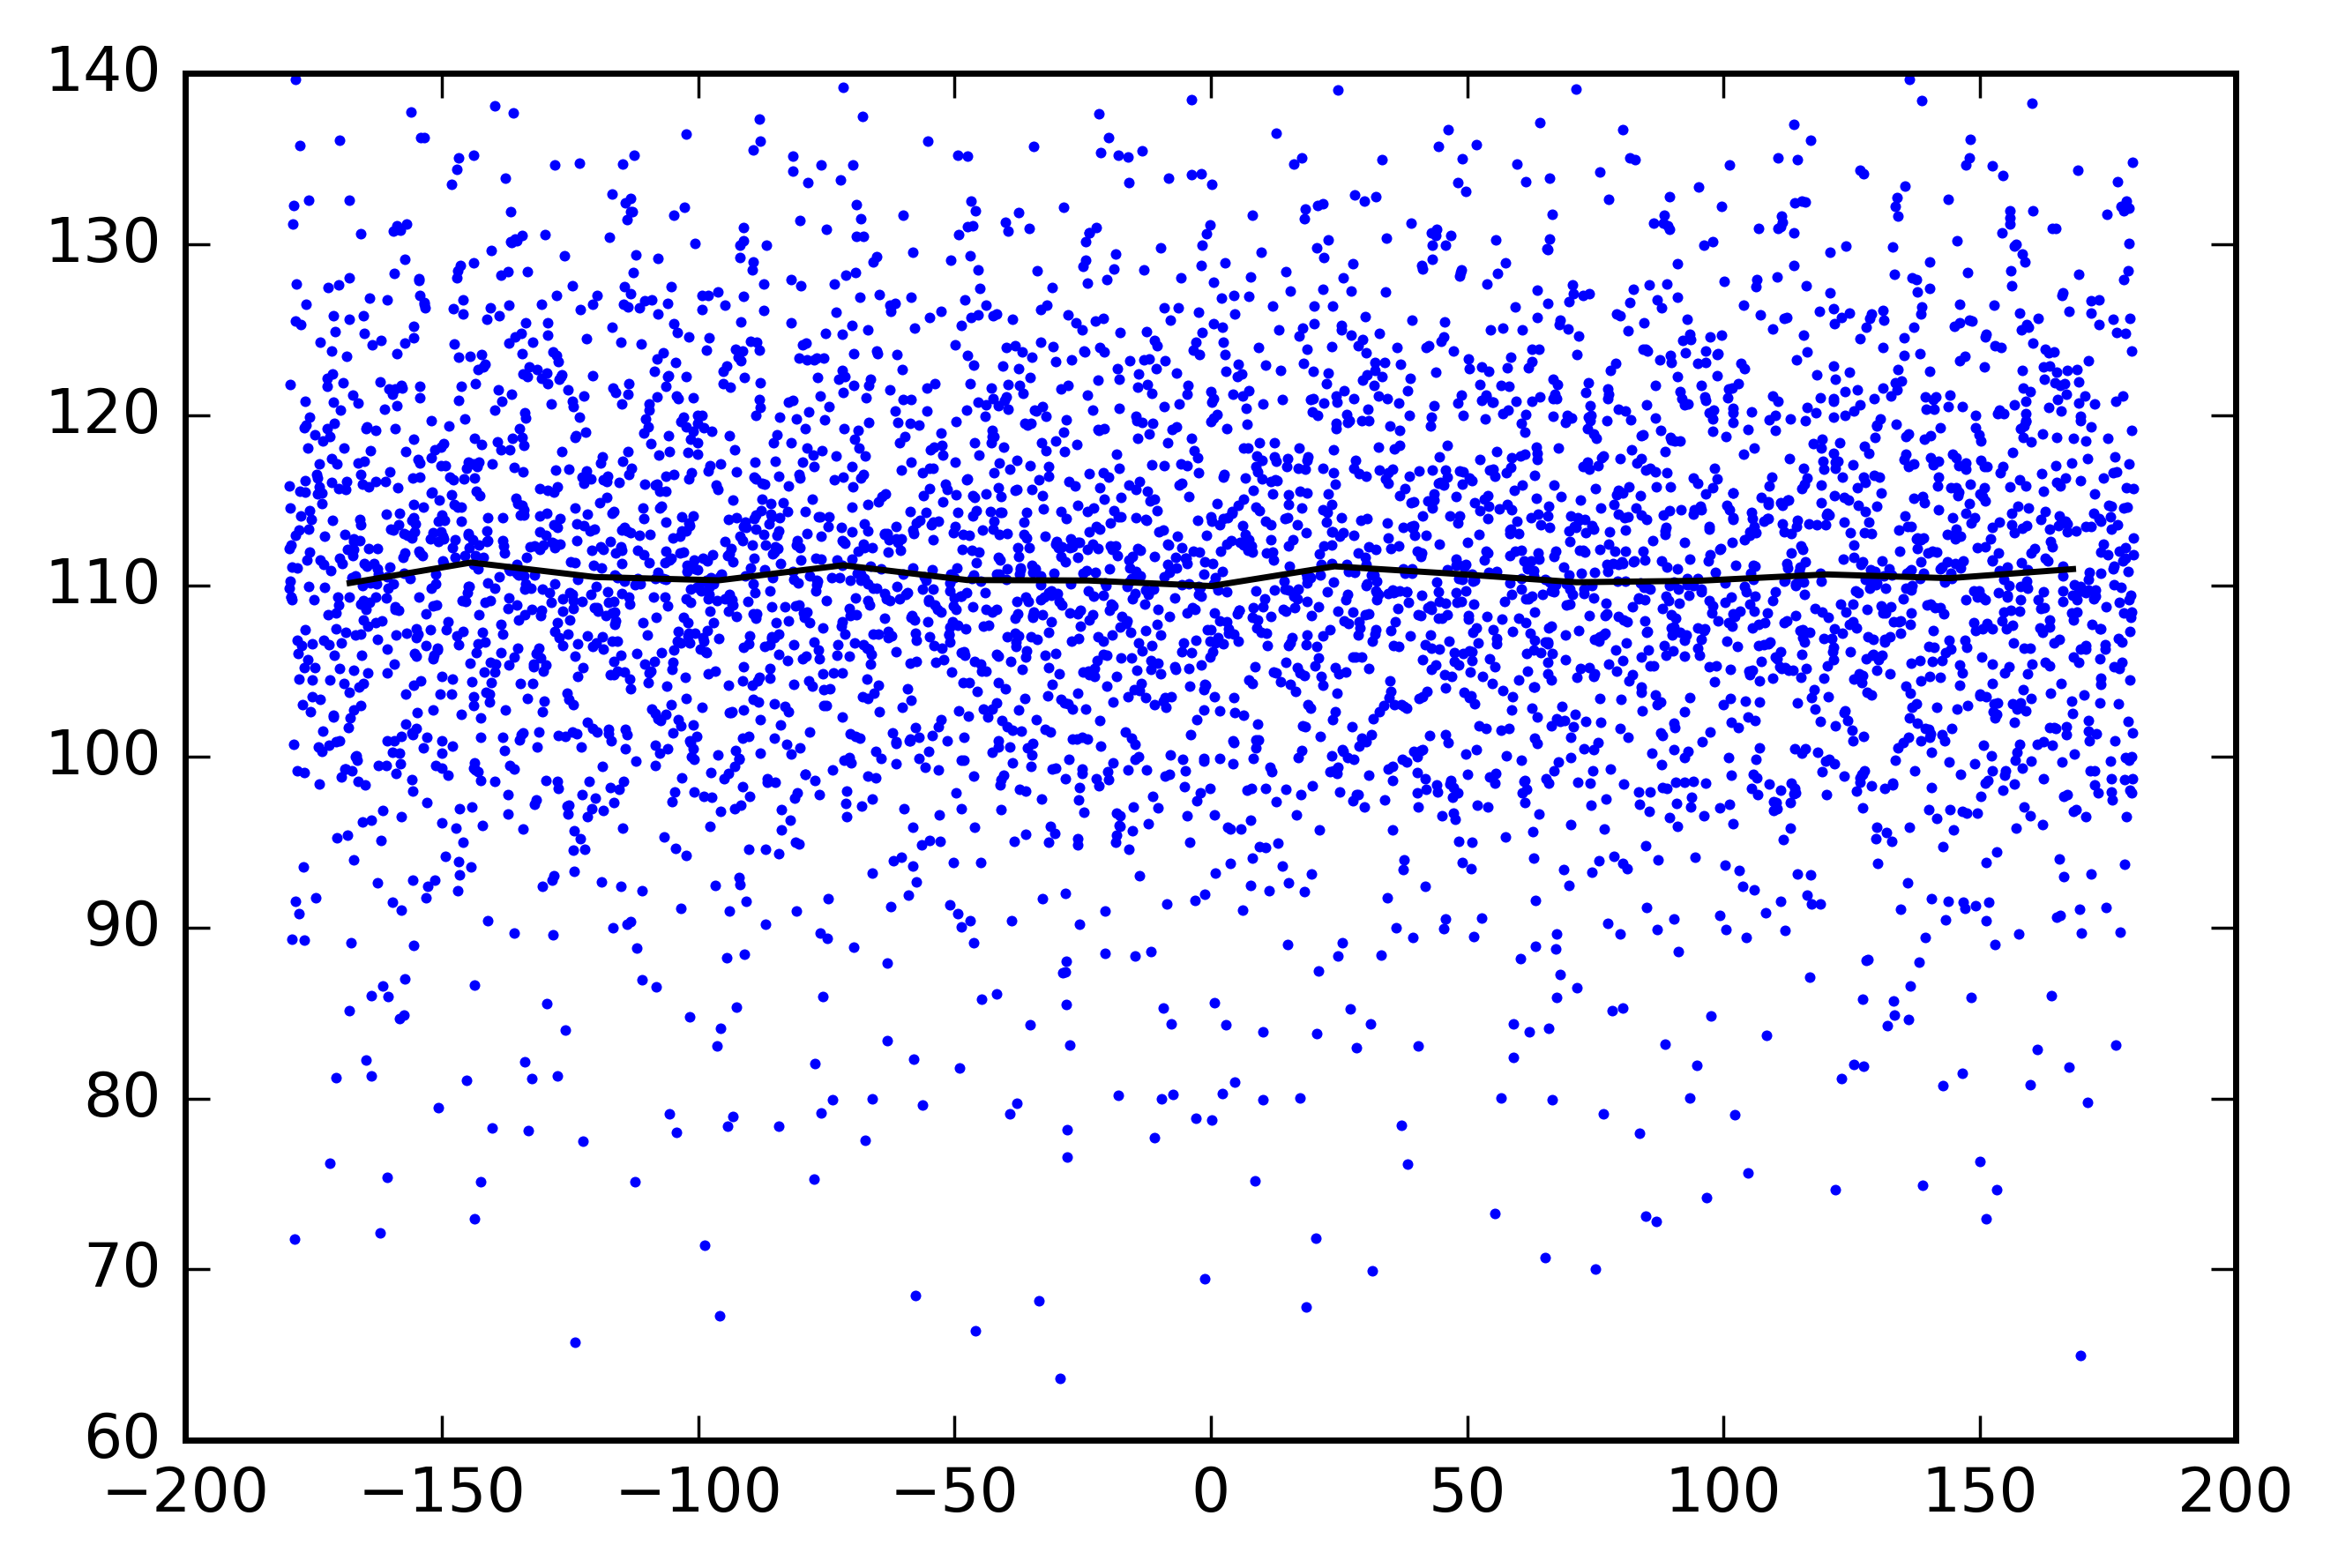

In [81]:
plt.figure()
plt.scatter(hp['long'],hp['hp_alt'],s=3,lw=0)
plt.plot(lon_bin['long'],lon_bin['hp_alt'],'k-')
plt.ylim(60,140)
plt.show()

In [122]:
bins = np.linspace(-180,180,16)
bin_mids = (bins[:-1]+bins[1:])/2
lonb = pd.cut(hp['long'],bins,labels=bin_mids)
lon_bin = hp.groupby(lonb).mean().reset_index()

ValueError: cannot insert long, already exists

In [102]:
hp.tail()

slope  intercept    rvalue  pvalue    stderr      hp_alt  orbit  \
5558  0.031319  -3.513266  0.949873     0.0  0.000312  119.302441   7636   
5559  0.031298  -3.508046  0.949831     0.0  0.000312  119.213590   7637   
5560  0.031295  -3.489204  0.940768     0.0  0.000342  118.623657   7638   
5561  0.032255  -3.651115  0.948111     0.0  0.000328  120.111789   7639   
5562  0.031507  -3.548042  0.943905     0.0  0.000335  119.694853   7641   

      count          Ls  abundance_Ar  ...    quality_CO2  quality_He  \
5558      9  240.836625  1.550635e+08  ...             OU          OV   
5559      9  240.953124  3.594992e+07  ...             OU          OV   
5560      9  241.069609  7.600304e+07  ...             IV          IV   
5561      9  241.186123  5.746181e+07  ...             OU          OV   
5562      9  241.419106  8.351983e+07  ...             OU          OV   

      quality_N2  quality_O       sza    t_sclk_cor        t_tid  \
5558          OV         OU  156.9805  5.889675e+08  5419.474298   
5559          OV         OU  156.7213  5.889834e+08  5418.684298   
5560          IV         IV  156.5245  5.889993e+08  5417.994297   
5561          OV         OU  156.4263  5.890152e+08  5418.474297   
5562          OV         OU  156.0715  5.890469e+08  5419.564298   

            t_unix                t_utc    tid  
5558  1.535696e+09  2018-08-31T06:06:04  28772  
5559  1.535711e+09  2018-08-31T10:31:05  28774  
5560  1.535727e+09  2018-08-31T14:56:03  28776  
5561  1.535743e+09  2018-08-31T19:21:04  28778  
5562  1.535775e+09  2018-09-01T04:10:57  28782  

[5 rows x 55 columns]

In [230]:
hp['dt'] = pd.tseries.tools.to_datetime(hp['t_utc'],infer_datetime_format=True)

In [257]:
start = dt.datetime(2015,2,8)
f27 = [start + dt.timedelta(27/2.*x) for x in range(0,100)]

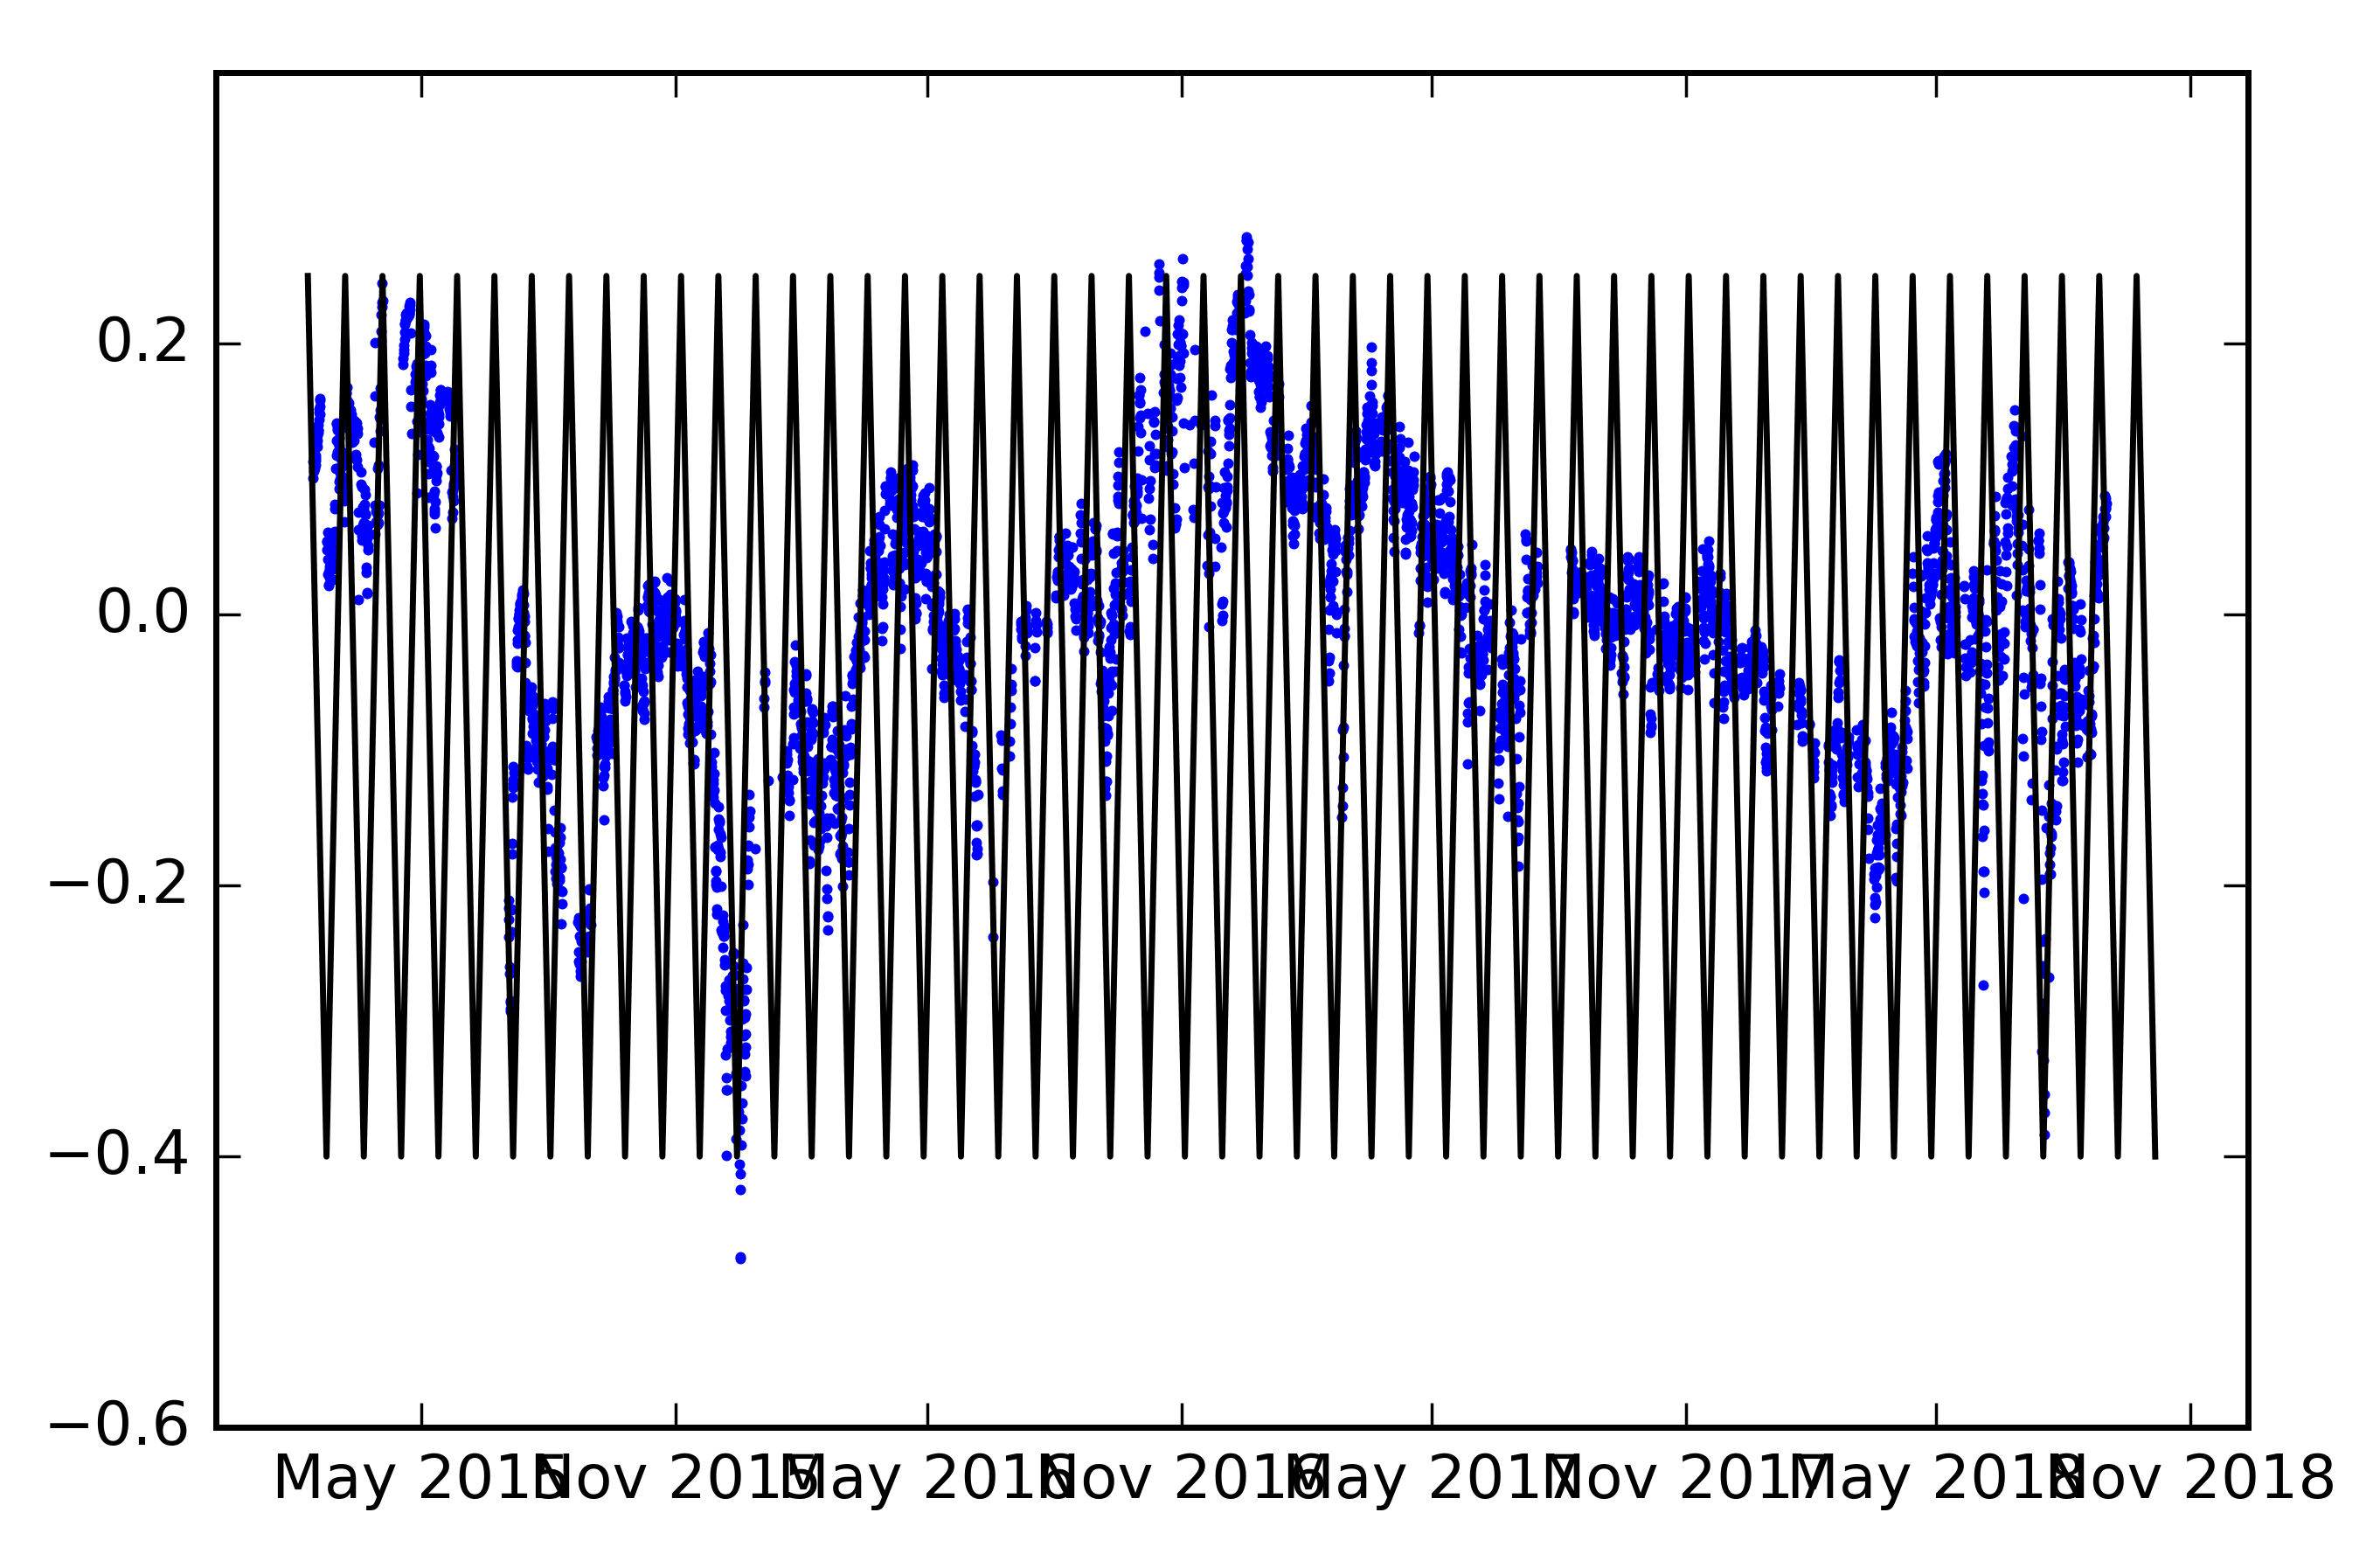

In [258]:
plt.figure()
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.scatter(list(hp['dt']),list((hp['hp_alt']-hp['hp_alt'].mean())/hp['hp_alt'].mean()),s=3,lw=0)
plt.plot(f27,[0.25,-0.4]*(len(f27)/2),'k-')
#plt.gcf().autofmt_xdate()
plt.show()